In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
def extreme_internal_allregions(args):
    regions = [USeast,USwest,iceland,europe,australia,tropics]
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions = ['USeast','USwest','iceland','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    return final_dataset

In [70]:
# settings 
#for mean temp
variable = 'tas'
models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'] 

# max temp
# variable = 'tasmax'
# models = ['MIROC6'] 

#for precip - still having issues getting EC-Earth data 
# variable = 'pr'
# models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'] 

In [71]:
USeast = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=41.3, lon=-72.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_41.3_287.5.zarr


In [72]:
USwest = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=37.7, lon=-122.4,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_37.7_237.6.zarr


In [73]:
iceland = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=65, lon=-19,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_65_341.zarr


In [74]:
europe = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=51,lon=10.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_51_10.5.zarr


In [75]:
australia = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=-25.2,lon=133.7,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_-25.2_133.7.zarr


In [76]:
tropics = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=3.9,lon=-53.1,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_3.9_306.9.zarr


In [77]:
internal = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':True
                                    }
                           )

In [78]:
internal

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           float64 0.9997
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/16)
    tas_occurance      (region, model, member, time) float64 nan nan ... nan nan
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_mean_le   (region, time) float64 nan nan nan nan ... nan nan nan
    internal_var_le    (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_var_fit   (region) float64 1.385e-10 1.972e-10 ... 2.595e-08
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

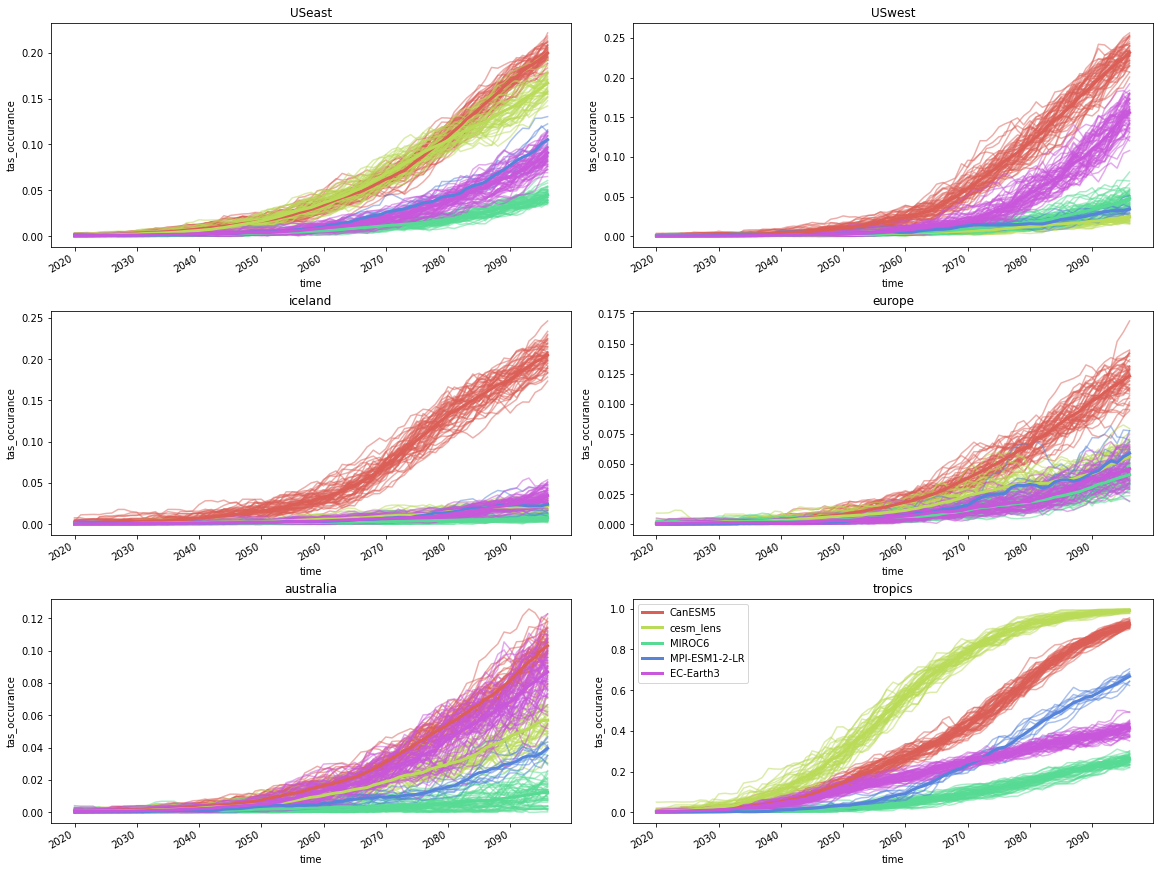

In [79]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(internal[variable+'_occurance'].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
# regions = [USeast,USwest,iceland,europe,australia,tropics]
regions = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal[variable+'_occurance'].model):
        m = internal.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

Text(0, 0.5, 'Model and Total Uncertainty (Deg C)')

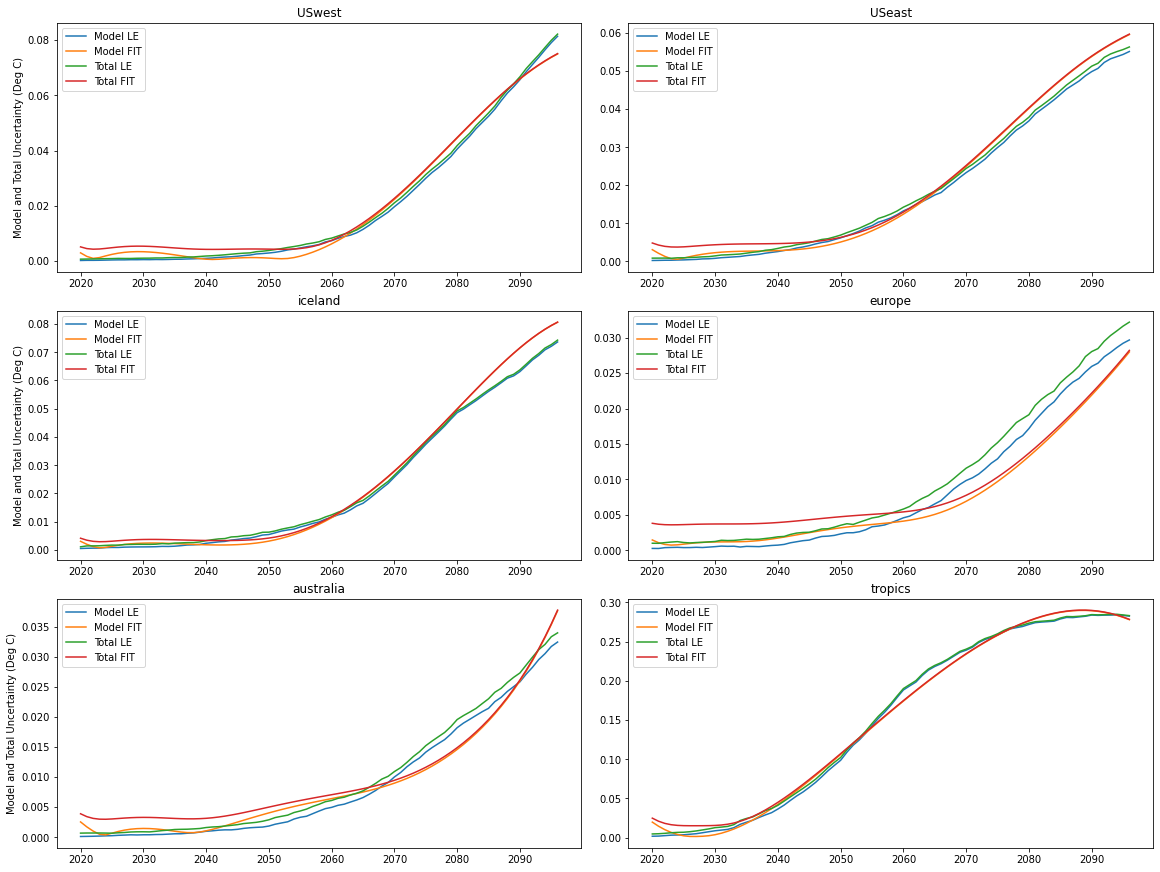

In [80]:
# plot model uncertainty and total uncertainty 
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USwest','USeast','iceland','europe','australia','tropics']
for axis,region in zip(axes,regions):
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).model_le),label='Model LE')
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).model_fit),label='Model FIT')
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).total_le),label='Total LE')
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).total_fit),label='Total FIT')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Model and Total Uncertainty (Deg C)')
ax[1,0].set_ylabel('Model and Total Uncertainty (Deg C)')
ax[2,0].set_ylabel('Model and Total Uncertainty (Deg C)')

Text(0, 0.5, 'Total Uncertainty')

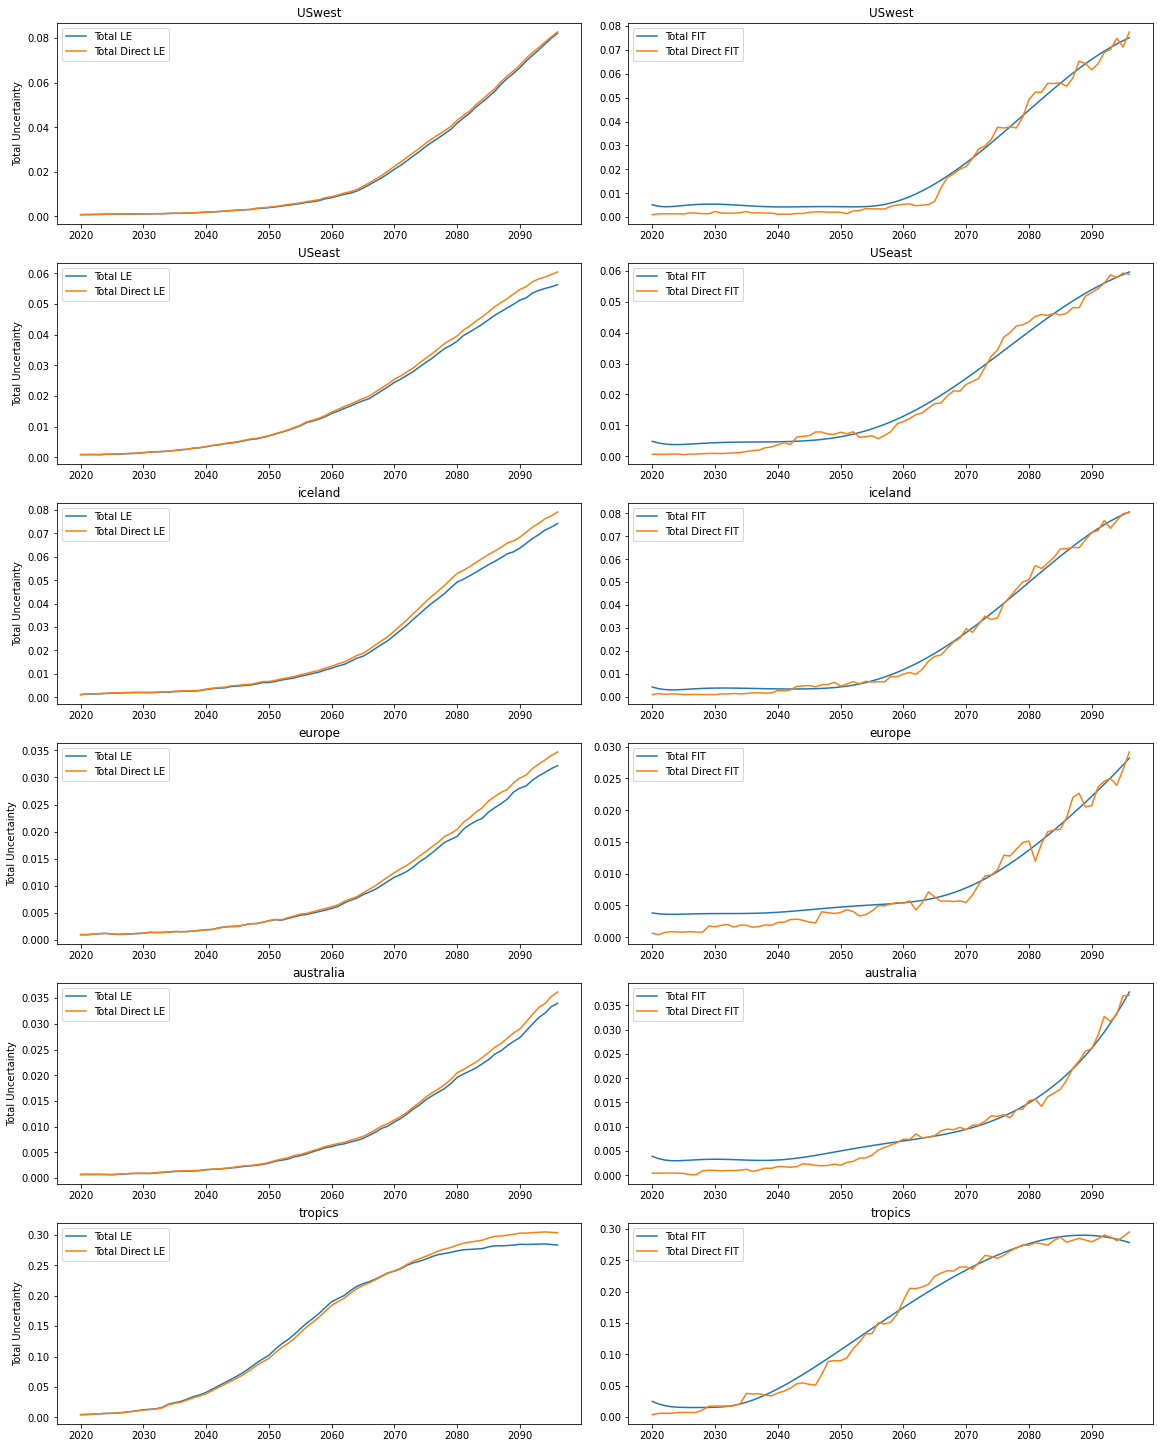

In [81]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
regions = ['USwest','USeast','iceland','europe','australia','tropics']
for axis,region in zip(axes,regions):
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).total_le),label='Total LE')
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).total_direct_le),label='Total Direct LE')
    axis.legend()
    axis.set_title(region)
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).total_fit),label='Total FIT')
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).total_direct_fit),label='Total Direct FIT')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Total Uncertainty')
ax[1,0].set_ylabel('Total Uncertainty')
ax[2,0].set_ylabel('Total Uncertainty')
ax[3,0].set_ylabel('Total Uncertainty')
ax[4,0].set_ylabel('Total Uncertainty')
ax[5,0].set_ylabel('Total Uncertainty')

Text(0, 0.5, 'Internal Variability')

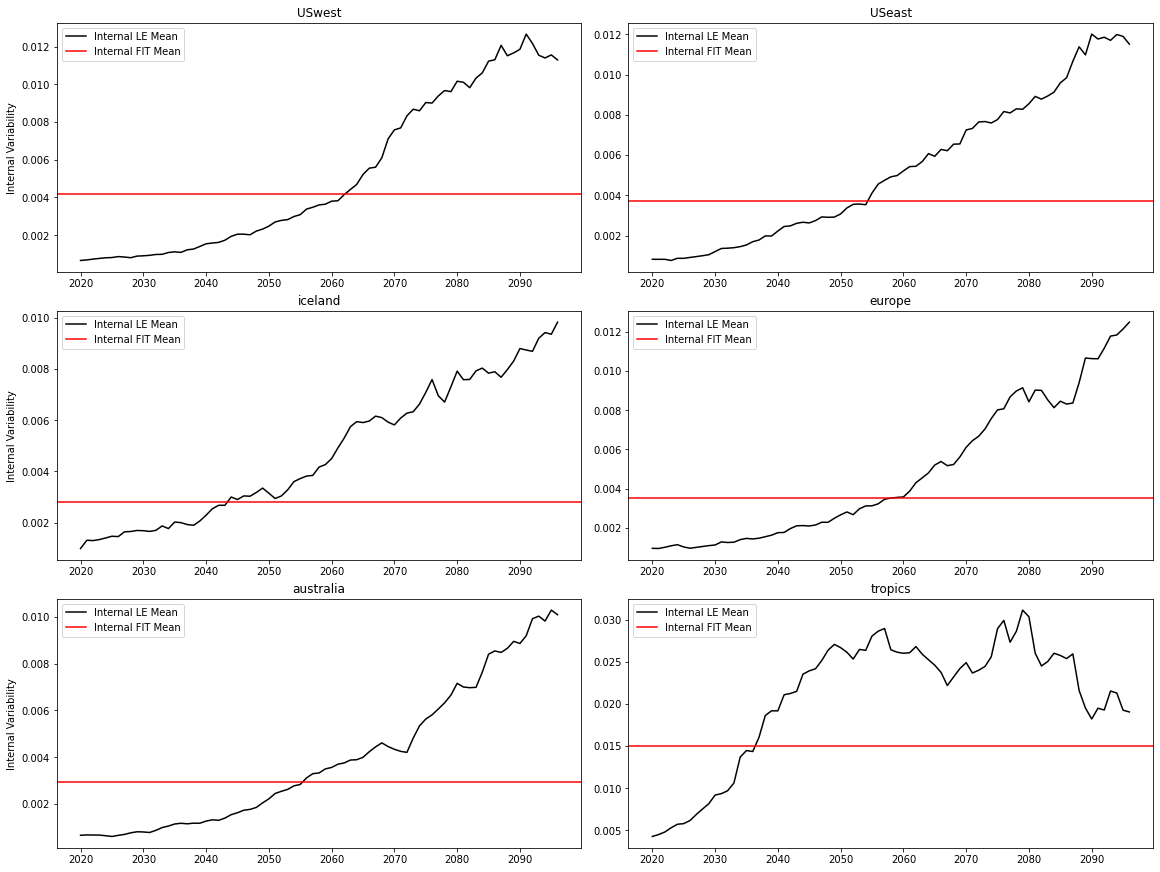

In [82]:
# plot internal variabilities using std dev
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).internal_mean_le),
              label='Internal LE Mean',color='k')
    axis.axhline(np.sqrt(internal.sel(region=region).internal_mean_fit),label='Internal FIT Mean',color='r')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Internal Variability')
ax[1,0].set_ylabel('Internal Variability')
ax[2,0].set_ylabel('Internal Variability')

Text(0, 0.5, 'Internal Variability')

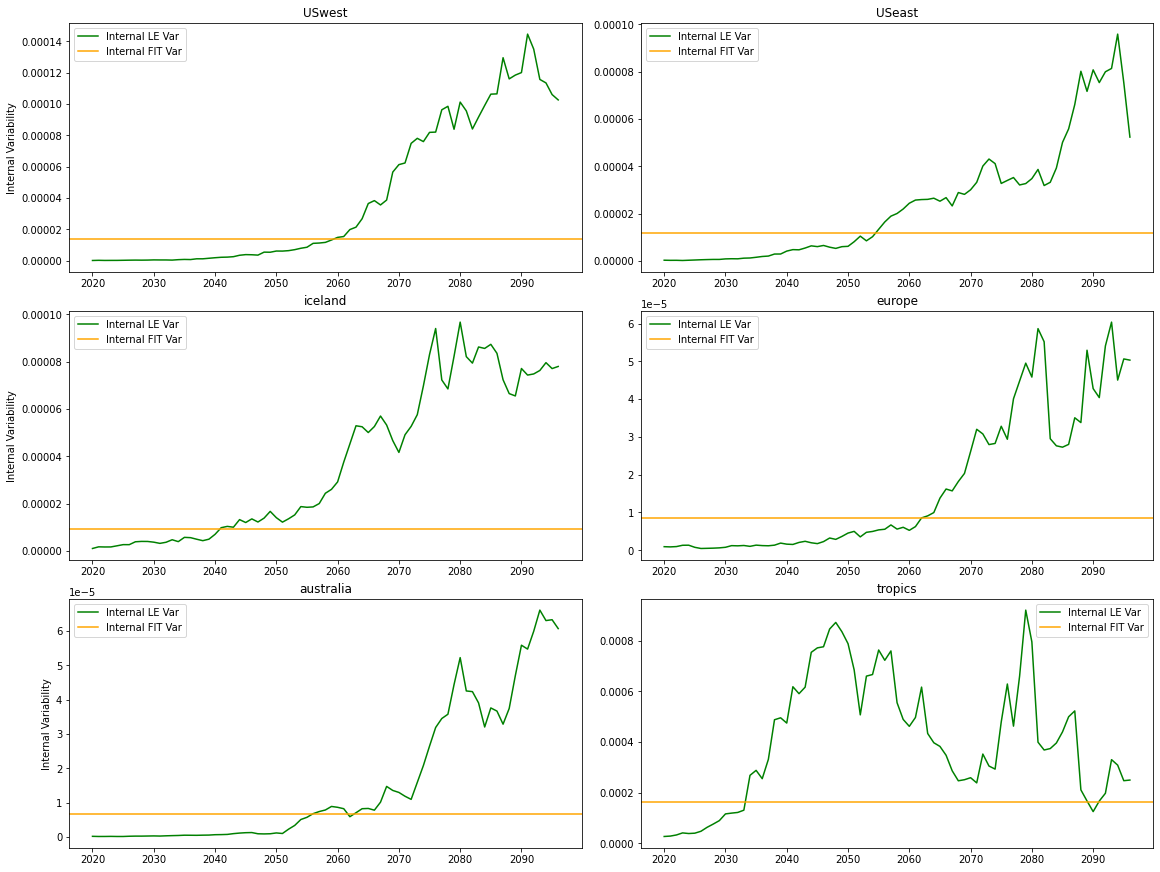

In [83]:
# plot internal variabilities using std dev
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).internal_var_le),label='Internal LE Var',color='g')
    axis.axhline(np.sqrt(internal.sel(region=region).internal_var_fit),label='Internal FIT Var',color='orange')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Internal Variability')
ax[1,0].set_ylabel('Internal Variability')
ax[2,0].set_ylabel('Internal Variability')

Text(0, 0.5, 'Internal Variability')

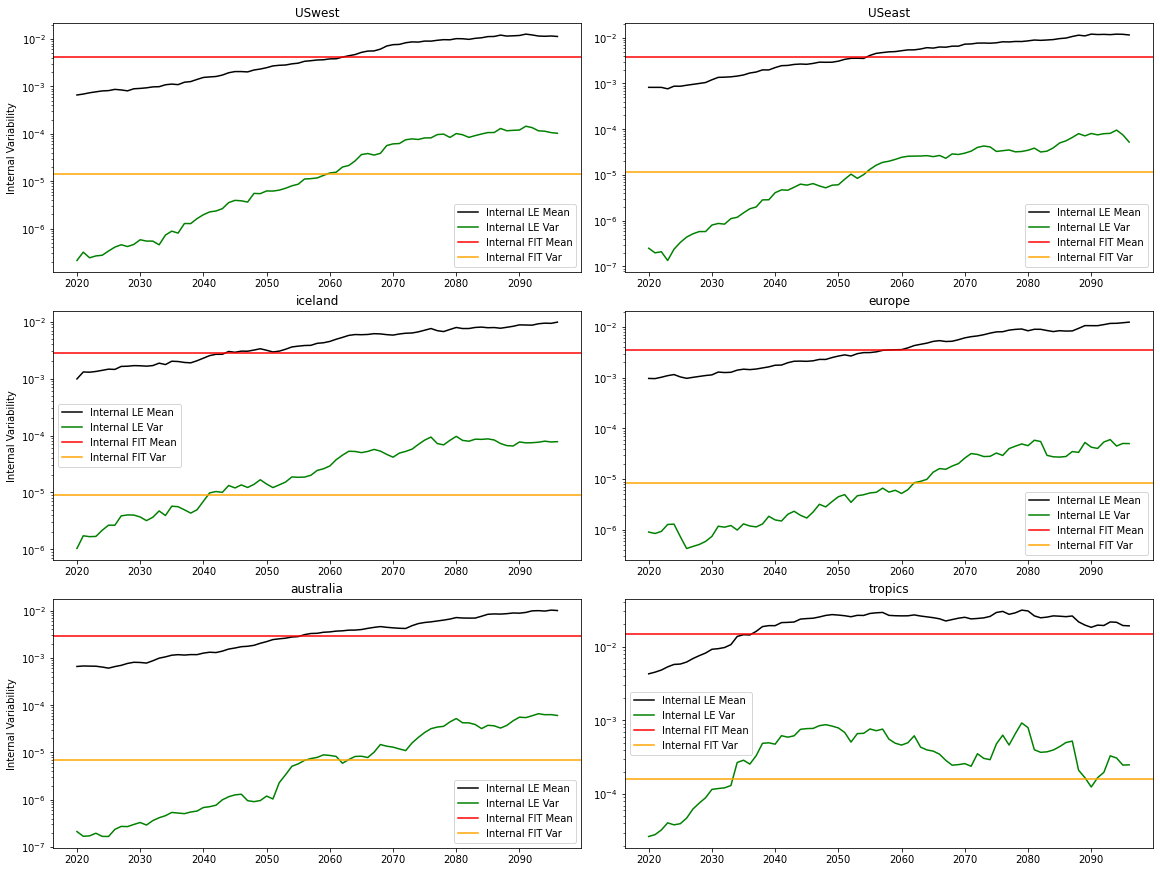

In [84]:
# plot internal variabilities using std dev
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).internal_mean_le),
              label='Internal LE Mean',color='k')
    axis.plot(internal.sel(region=region).time,np.sqrt(internal.sel(region=region).internal_var_le),
              label='Internal LE Var',color='g')
    axis.axhline(np.sqrt(internal.sel(region=region).internal_mean_fit),label='Internal FIT Mean',color='r')
    axis.axhline(np.sqrt(internal.sel(region=region).internal_var_fit),label='Internal FIT Var',color='orange')
    axis.set_yscale('log')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Internal Variability')
ax[1,0].set_ylabel('Internal Variability')
ax[2,0].set_ylabel('Internal Variability')

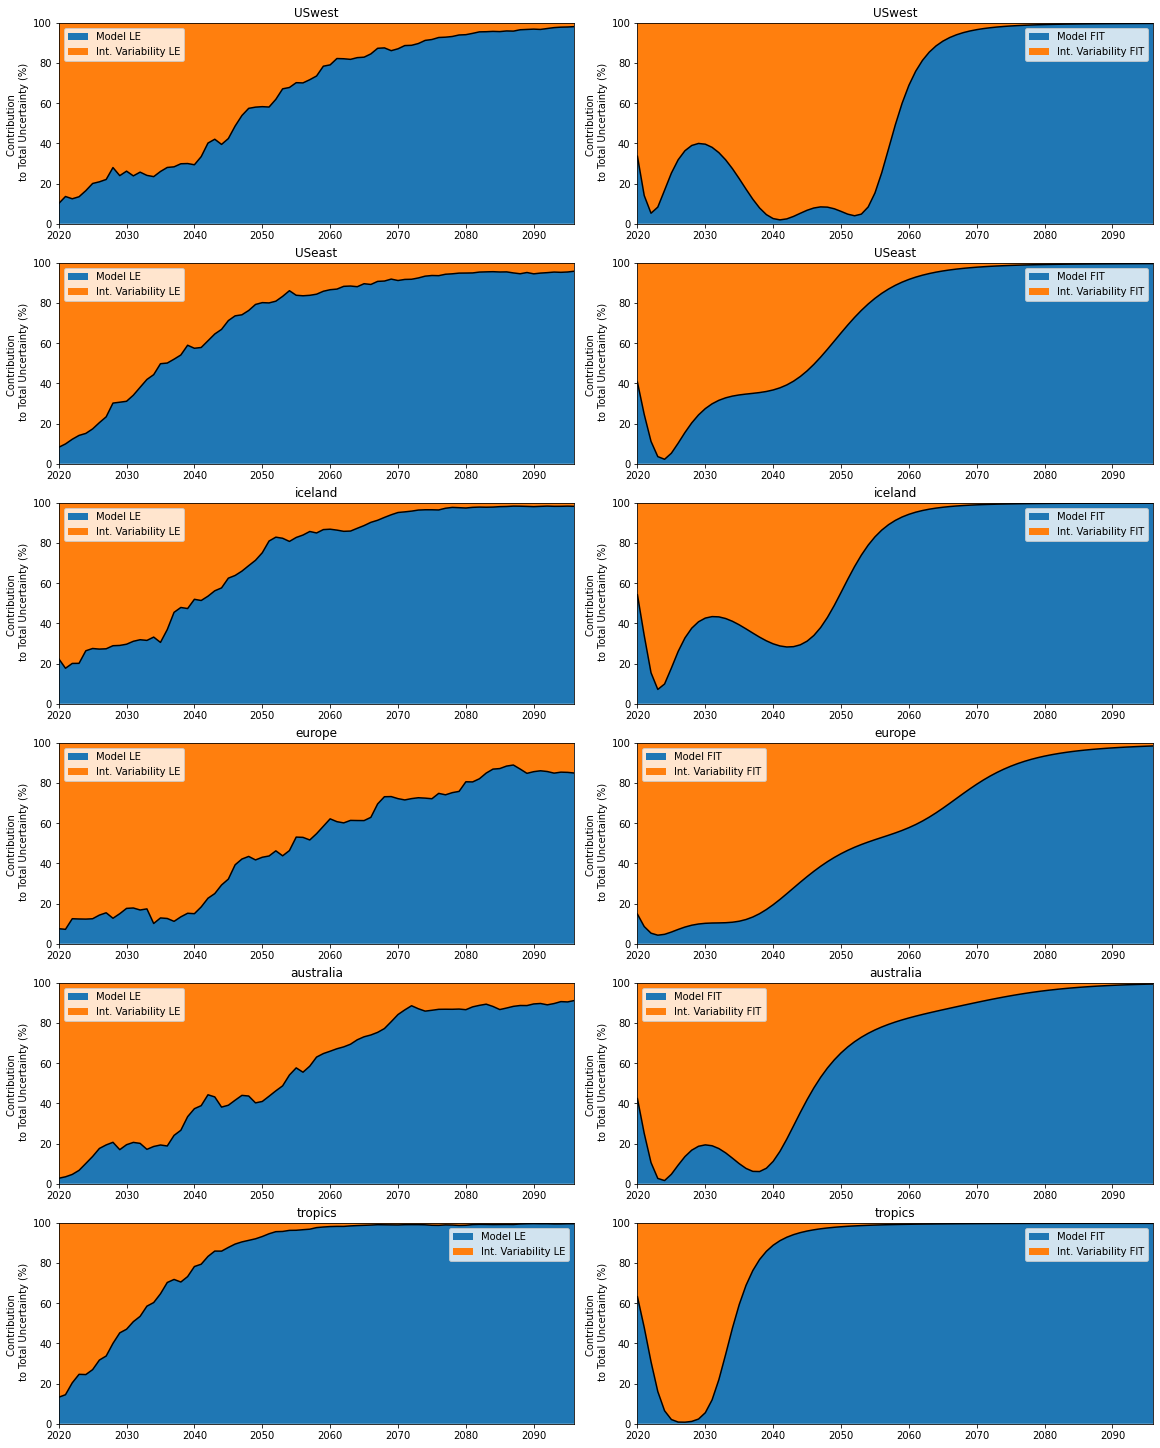

In [85]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal.sel(region=region).time
    y=internal.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal.sel(region=region).time,internal.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal.sel(region=region).time
    y=internal.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal.sel(region=region).time,internal.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])

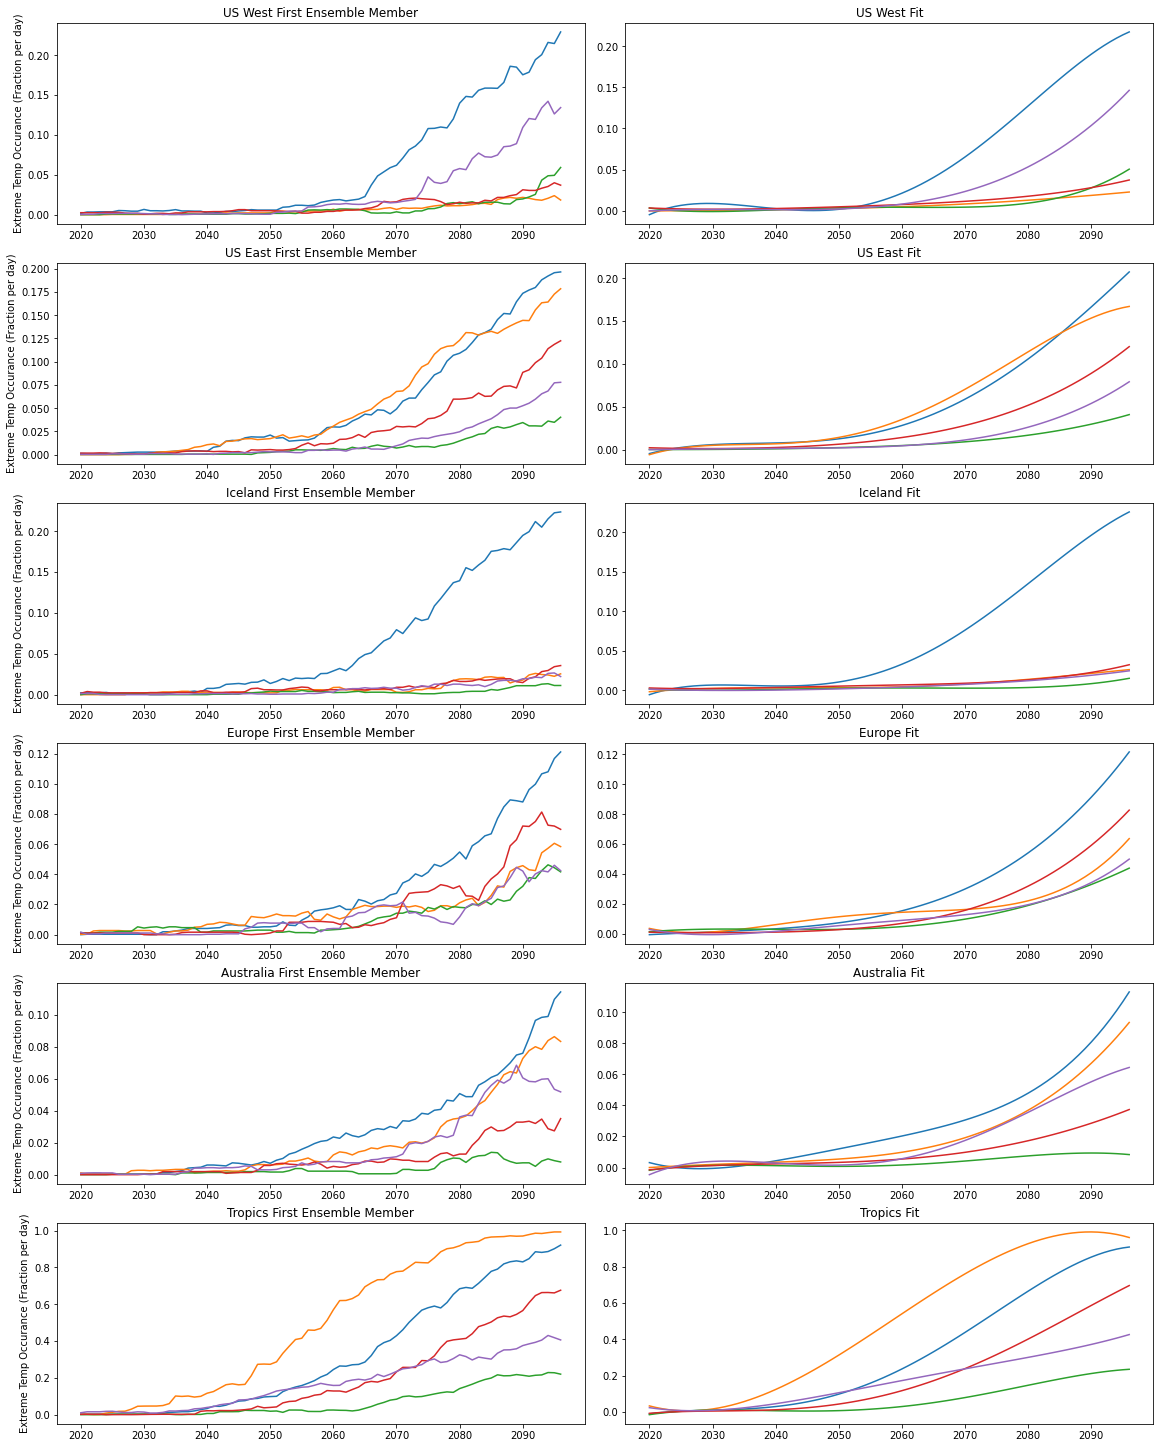

In [86]:
# plot data used for FIT method 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West First Ensemble Member','US East First Ensemble Member',
          'Iceland First Ensemble Member','Europe First Ensemble Member',
          'Australia First Ensemble Member','Tropics First Ensemble Member']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal.sel(region=region).time,internal[variable+'_occurance'].sel(region=region).isel(model=m).isel(member=0))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal.sel(region=region).time,internal.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

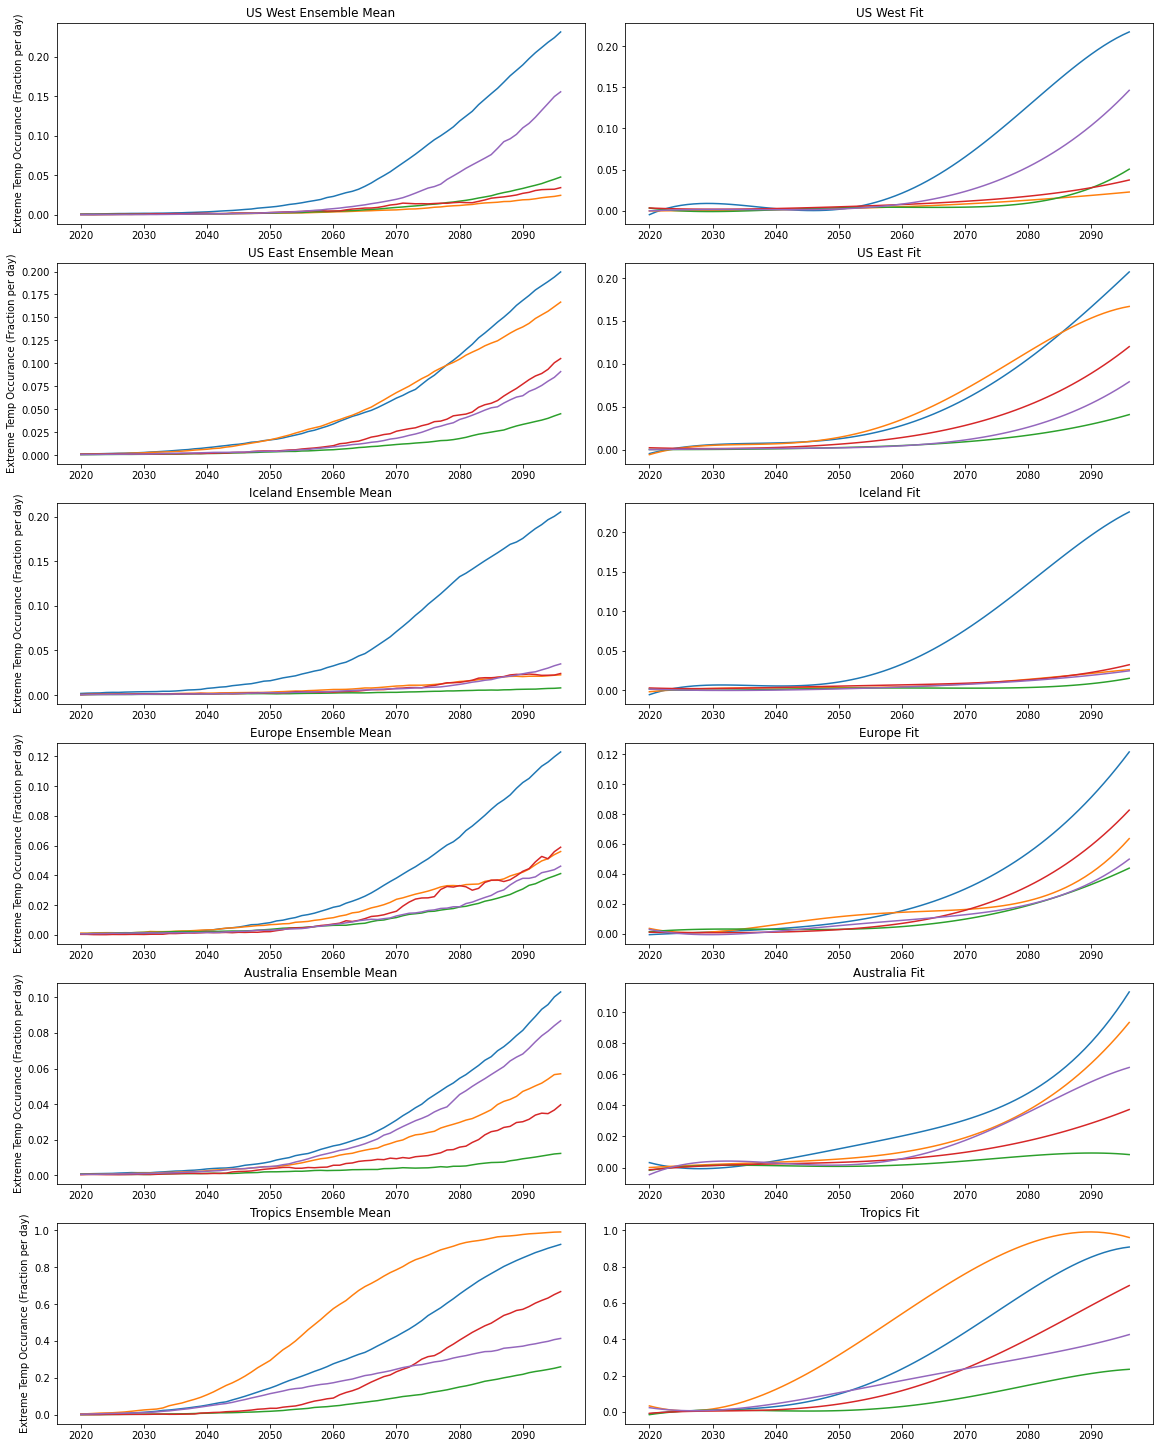

In [87]:
# plot data used for FIT method 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West Ensemble Mean','US East Ensemble Mean',
          'Iceland Ensemble Mean','Europe Ensemble Mean',
          'Australia Ensemble Mean','Tropics Ensemble Mean']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal.sel(region=region).time,internal.sel(region=region).isel(model=m).tas_occurance.mean(dim='member'))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal.sel(region=region).time,internal.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

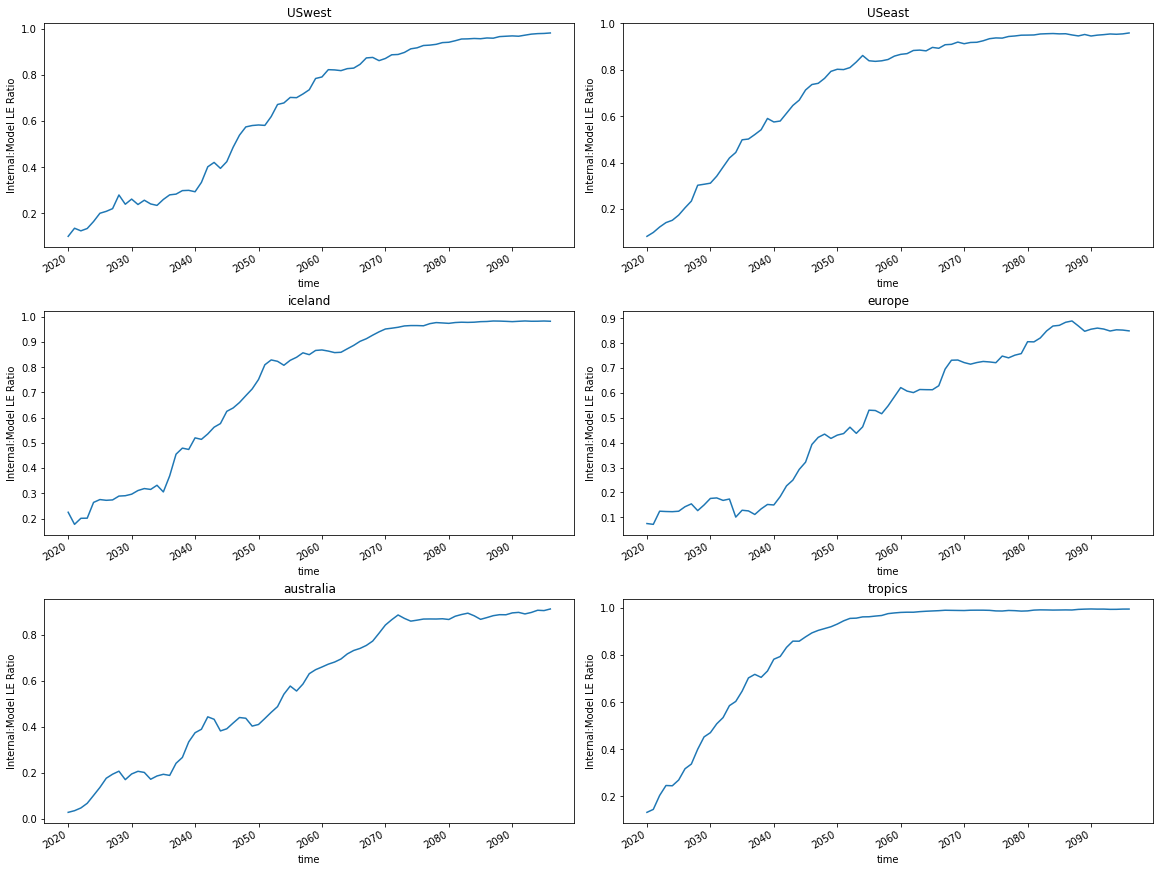

In [88]:
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for r,axe in zip(regions,axes):
    (internal.sel(region=r).model_le/internal.sel(region=r).total_le).plot(ax=axe)
    axe.set_ylabel('Internal:Model LE Ratio')
    axe.set_title(r)

### Xarray Plotting 

In [105]:
USeast_hist

<xarray.Dataset>
Dimensions:    (member: 50, time: 34699, model: 4)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' 'MIROC6' 'MPI-ESM1-2-LR'
Data variables:
    pr         (model, member, time) float32 2.526e-06 1.432e-05 ... nan nan
Attributes: (12/49)
    CCCma_model_hash:           Unknown
    CCCma_parent_runid:         p2-pictrl
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    Conventions:                CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:  1850:01:01:00
    activity_id:                CMIP
    ...                         ...
    table_info:                 Creation Date:(20 February 2019) MD5:374fbe5a...
    title:                      CanESM5 output prepared for CMIP6
    tracking_id:                hdl:21.14100/2c5b35e9-b26b-48c6-8467-65876c54...
    variable_id:                pr
    version:                    v20190429
    version_id:                 v20190429

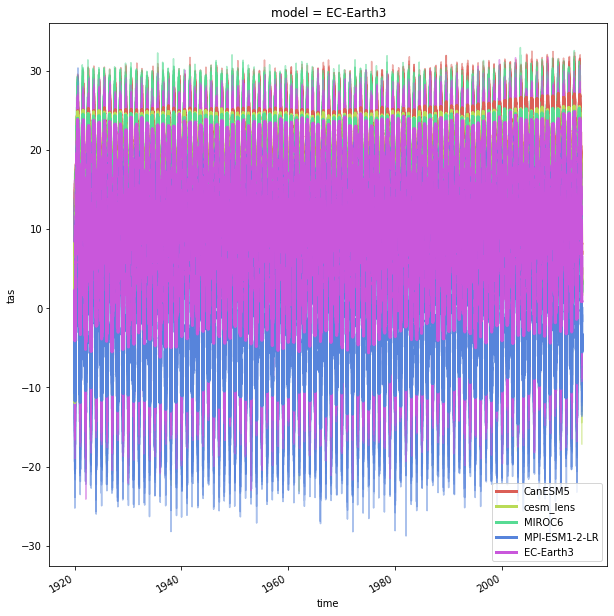

In [28]:
plt.figure(figsize=(10,10))
colors = sns.color_palette("hls", len(USeast_hist.tas.model))

for i, model in enumerate(USeast_hist.tas.model):
    m = USeast_hist.tas.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

In [127]:
colors = sns.color_palette("hls", len(USeast_hist.pr.model))

In [128]:
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [131]:
range(len(colors))

range(0, 4)

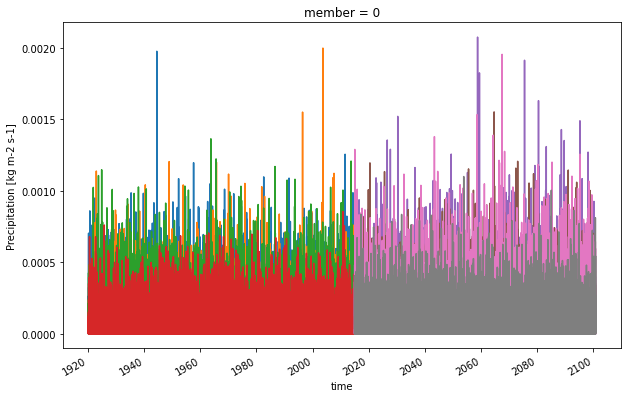

In [140]:
plt.figure(figsize=(10,6))
# colors = sns.color_palette("hls", len(USeast_hist.pr.model))
# for i in range(len(colors)):
USeast_hist.isel(member=0).pr.plot(hue='model',add_legend=False);
USeast_future.isel(member=0).pr.plot(hue='model',add_legend=False);

In [141]:
USeast_hist.mean(dim='member')

<xarray.Dataset>
Dimensions:  (time: 34699, model: 4)
Coordinates:
  * time     (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2014-12-31
  * model    (model) <U13 'CanESM5' 'cesm_lens' 'MIROC6' 'MPI-ESM1-2-LR'
Data variables:
    pr       (model, time) float32 6.627e-05 2.867e-05 ... 3.342e-05 5.428e-06

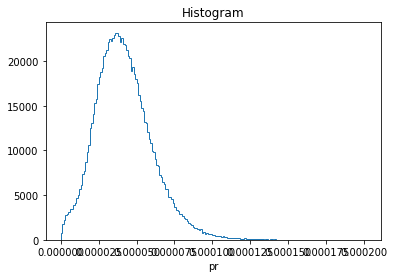

In [150]:
USeast_em = USeast_hist.mean(dim='member')
dbins, bmin, bmax = 0.000001, 0, 0.0002
bins = np.arange(bmin,bmax+dbins,dbins)
USeast_em.pr.plot.hist(histtype='step',density=True,bins=bins);

### stepwise extreme internal variabilitiy calculation

In [18]:
USeast.hist.tas

<xarray.DataArray 'tas' (model: 5, member: 71, time: 34699)>
array([[[  5.1042786 ,   3.647583  ,  -2.3996277 , ...,   9.625244  ,
          11.661621  ,  11.274811  ],
        [ -1.7633362 ,   3.3706055 ,   6.428467  , ...,   3.9814758 ,
           8.656372  ,  12.116974  ],
        [  3.2999268 ,   6.5798645 ,   5.6648254 , ...,   3.0975647 ,
          10.967621  ,   8.036224  ],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[  8.576843  ,   5.2818604 ,  -0.19039917, ...,   5.50296   ,
           7.861145  ,  -3.7052307 ],
        [  8.129364  ,   5.283905  ,  -0.25665283, ...,   4.895447  ,
           5.768341  ,   8.519501  ],
        [  8.12973   ,   5.2524414 ,  -0.37771606, ...,   7.263855  ,
           8.4505005 ,   5.7686768 ],
...
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [ -3.6169739 ,  -2.7695618 ,  -5.861145  , ...,  -7.2181396 ,
          -5.054352  ,   1.2416077 ],
        [ 14.24234   ,  -0.25231934,  -1.9758301 , ...,   2.1073914 ,
           4.409424  ,   0.12854004],
        [ 13.424011  ,   8.118286  ,  -0.16220093, ...,   0.27285767,
          11.622589  ,   5.662628  ]]], dtype=float32)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'

In [39]:
    def quantile_occurance(postprocess, future, hist, variable, return_period, conseq_days=1, coarsen=1, 
                           hist_slice=slice(None, None)):

        hist = hist[variable].sel(time=hist_slice)
        future = future[variable]
        
        #rolling average 
        hist = hist.rolling(time=conseq_days, center=True).mean()
        future = future.rolling(time=conseq_days, center=True).mean()

        #coarsen 
        hist = hist.coarsen(time=coarsen,boundary='trim').max()
        future = future.coarsen(time=coarsen,boundary='trim').max()
        
        # find number of expected events in period covered by x
        expected_events = len(np.unique(hist.time.dt.year)) / return_period
        q = 1 - expected_events / len(hist.time)

        # get quantile 
        if postprocess == True:
            quantile = hist.quantile(q, ('time','member'))
        elif postprocess == False:
            quantile = hist.quantile(q, ('time','member','model'))
        occurance_hist = hist > quantile
        occurance_hist = occurance_hist.where(np.isfinite(hist), np.NaN)
        occurance_future = future > quantile
        occurance_future = occurance_future.where(np.isfinite(future), np.NaN)

        return occurance_hist, occurance_future


In [40]:
hist = USeast.hist
future = USeast.future

In [45]:
        hist = hist.rolling(time=1, center=True).mean()
        future = future.rolling(time=1, center=True).mean()

In [46]:
        hist = hist.coarsen(time=7,boundary='trim').max()
        future = future.coarsen(time=7,boundary='trim').max()

In [48]:
        expected_events = len(np.unique(hist.time.dt.year)) / 10
        q = 1 - expected_events / len(hist.time)

In [49]:
len(np.unique(hist.time.dt.year))

95

In [50]:
hist.time.dt.year

<xarray.DataArray 'year' (time: 4957)>
array([1920, 1920, 1920, ..., 2014, 2014, 2014])
Coordinates:
  * time     (time) datetime64[ns] 1920-01-04 1920-01-11 ... 2014-12-28

In [43]:
occurance_hist,occurance_future = quantile_occurance(postprocess=False,
                                                     future = future,
                                                     hist=hist,
                                                     variable='tas',
                                                     return_period=10,
                                                     coarsen=7,
                                                     hist_slice=slice('1995','2014'),
                                                     conseq_days=1)

In [44]:
occurance_hist

<xarray.DataArray 'tas' (model: 5, member: 71, time: 1043)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1995-01-04 1995-01-11 ... 2014-12-24
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 0.9981

In [25]:
    def polyfit(data):
        """Perform 4th order polynomial fit for ensembles in CESM dataset

        Parameters
        ---------
        data: CESM dataset 

        Returns
        -------
        fit: dataset of CESM fitted data 
        """
        # create X and Y variables for the model fit 
        X = np.arange(len(data.time))    # x variable is length of time
        Y = data.values  # y is the temp data

        # the polynomial fit (4th order)
        Z = np.polyfit(X,Y,4)
        fit = data.copy()

        # calculate the fit using coefs from Z
        for i, m in enumerate(fit.model):
            p = np.poly1d(Z[:,i])
            fit[:, i] = p(X)

        return fit
    
    def compute_modelLE(data):
        ensemble_mean = data.mean('member')
        model = ensemble_mean.var('model')
    
        return model
    
    def compute_internalLE(data):
        internal = data.var('member')
        internal = internal.mean(dim='model')
        return internal
    
    def compute_total_uncertainty(internal,model):
        total = internal + model
        return total
    
    def compute_total_direct(data):
        total_direct = data.var(dim=('model','member'))
        return total_direct
    
    def compute_percent_contribution(internal,model,total):
        internal_percent = ((internal/total)*100)
        model_percent = ((model/total)*100)
        return internal_percent,model_percent
    
    def get_fit(data):
        first_member = data.isel(member=0).dropna(dim='time')
        fit = polyfit(first_member)
        return fit
    
    def compute_internalFIT(data,fit):
        residual = data - fit
        internal = residual.var('time').mean()
        return internal
    
    def compute_modelFIT(fit):
        model = fit.var('model')
        return model
    
    def compute_totaldirect_fit(data):
        total_direct = data.var('model')
        return total_direct

In [122]:
def extreme_internal_variability(data,time,variable):
    
    dataset = xr.Dataset()
    
    occurance = data.resample(time='AS').mean().rolling(time=time, center=True).mean()
    dataset[variable+'_occurance'] = occurance 
    
        # Internal var via LE method 
    dataset['model_le'] = compute_modelLE(data=dataset[variable+'_occurance'])
    dataset['internal_le'] = compute_internalLE(data=dataset[variable+'_occurance'])
    dataset['total_le'] = compute_total_uncertainty(internal=dataset['internal_le'],
                                                         model=dataset['model_le'])
    dataset['total_direct_le'] = compute_total_direct(data=dataset[variable+'_occurance'])
    dataset['internal_le_frac'],dataset['model_le_frac']=compute_percent_contribution(internal=dataset['internal_le'],
                                                                        model=dataset['model_le'],
                                                                        total = dataset['total_le'])
    # Internal var via FIT method
    dataset['fit'] = get_fit(data=dataset[variable+'_occurance'].T)
    dataset['internal_fit'] = compute_internalFIT(data=dataset[variable+'_occurance'].isel(member=0),
                                                           fit = dataset['fit'])
    dataset['model_fit'] = compute_modelFIT(fit=dataset['fit'])
    dataset['total_fit'] = compute_total_uncertainty(internal=dataset['internal_fit'],
                                                          model=dataset['model_fit'])
    dataset['internal_fit_frac'],dataset['model_fit_frac']= compute_percent_contribution(internal=dataset['internal_fit'],
                                                                 model=dataset['model_fit'],
                                                                 total = dataset['total_fit'])
    dataset['total_direct_fit'] = compute_totaldirect_fit(data=dataset[variable+'_occurance'].isel(member=0))
 
    return dataset

In [4]:
USeast.hist

<xarray.Dataset>
Dimensions:    (member: 71, time: 34699, model: 5)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
Data variables:
    tas        (model, member, time) float32 5.104 3.648 -2.4 ... 11.62 5.663
Attributes: (12/49)
    CCCma_model_hash:           Unknown
    CCCma_parent_runid:         p2-pictrl
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    Conventions:                CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:  1850:01:01:00
    activity_id:                CMIP
    ...                         ...
    table_info:                 Creation Date:(20 February 2019) MD5:374fbe5a...
    title:                      CanESM5 output prepared for CMIP6
    tracking_id:                hdl:21.14100/13a818c0-52d1-48e6-b6f5-482ea59b...
    variable_id:                tas
    version:                    v20190429
    version_id:                 v20190429

In [5]:
USeast.future

<xarray.Dataset>
Dimensions:    (member: 58, time: 31411, model: 5)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    member_id  (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... 'r3i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
Data variables:
    tas        (model, member, time) float32 8.459 14.97 9.194 ... 9.081 13.65
Attributes: (12/48)
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    YMDH_branch_time_in_parent:  2015:01:01:00
    activity_id:                 ScenarioMIP
    branch_method:               Spin-up documentation
    branch_time_in_child:        60225.0
    ...                          ...
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/97bf8e66-ae69-4cd1-b64e-92388c3...
    variable_id:                 tas
    version:                     v20190429
    version_id:                  v20190429

In [120]:
occurance_hist,occurance_future = quantile_occurance(USeast.hist.tas,USeast.future.tas,0.99)

In [104]:
occurance_future

<xarray.DataArray 'tas' (model: 4, member: 50, time: 31411)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    member_id  (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' 'MIROC6' 'MPI-ESM1-2-LR'
    quantile   float64 0.99

In [21]:
dataset = xr.Dataset()

In [22]:
occurance = occurance_future.resample(time='AS').mean().rolling(time=10, center=True).mean()
dataset['tas_occurance'] = occurance

In [23]:
dataset

<xarray.Dataset>
Dimensions:        (time: 86, member: 58, model: 5)
Coordinates:
  * time           (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member         (member) int64 0 1 2 3 4 5 6 7 8 ... 50 51 52 53 54 55 56 57
    member_id      (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... 'r3i1p1f1'
  * model          (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile       float64 0.9997
Data variables:
    tas_occurance  (model, member, time) float64 nan nan nan nan ... nan nan nan

In [26]:
dataset['model_le'] = compute_modelLE(data=dataset['tas_occurance'])

In [27]:
dataset['internal_le'] = compute_internalLE(data=dataset['tas_occurance'])
dataset['total_le'] = compute_total_uncertainty(internal=dataset['internal_le'],
                                                         model=dataset['model_le'])
dataset['total_direct_le'] = compute_total_direct(data=dataset['tas_occurance'])
dataset['internal_le_frac'],dataset['model_le_frac']=compute_percent_contribution(internal=dataset['internal_le'],
                                                                        model=dataset['model_le'],
                                                                        total = dataset['total_le'])

In [28]:
np.arange(len(dataset['tas_occurance'].time))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [29]:
np.shape(dataset['tas_occurance'].values)

(5, 58, 86)

In [30]:
dataset['fit'] = get_fit(data=dataset['tas_occurance'].T)

In [31]:
    dataset['internal_fit'] = compute_internalFIT(data=dataset['tas_occurance'].isel(member=0),
                                                           fit = dataset['fit'])
    dataset['model_fit'] = compute_modelFIT(fit=dataset['fit'])
    dataset['total_fit'] = compute_total_uncertainty(internal=dataset['internal_fit'],
                                                          model=dataset['model_fit'])
    dataset['internal_fit_frac'],dataset['model_fit_frac']= compute_percent_contribution(internal=dataset['internal_fit'],
                                                                 model=dataset['model_fit'],
                                                                 total = dataset['total_fit'])
    dataset['total_direct_fit'] = compute_totaldirect_fit(data=dataset['tas_occurance'].isel(member=0))

In [32]:
extreme_internal = extreme_internal_variability(data=occurance_future,
                                                time=10,variable='tas')

NameError: name 'extreme_internal_variability' is not defined

In [33]:
dataset

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           float64 0.9997
Data variables: (12/14)
    tas_occurance      (model, member, time) float64 nan nan nan ... nan nan nan
    model_le           (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_le        (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_le           (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_direct_le    (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_le_frac   (time) float64 nan nan nan nan nan ... nan nan nan nan
    ...                 ...
    internal_fit       float64 3.412e-05
    model_fit          (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_fit          (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_fit_frac  (time) float64 nan nan nan nan nan ... nan nan nan nan
    model_fit_frac     (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_direct_fit   (time) float64 nan nan nan nan nan ... nan nan nan nan

In [124]:
extreme_internal

<xarray.Dataset>
Dimensions:            (time: 86, member: 50, model: 4)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    member_id          (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... nan
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR'
    quantile           float64 0.99
Data variables: (12/14)
    tas_occurance      (model, member, time) float64 nan nan nan ... nan nan nan
    model_le           (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_le        (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_le           (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_direct_le    (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_le_frac   (time) float64 nan nan nan nan nan ... nan nan nan nan
    ...                 ...
    internal_fit       float64 3.052e-05
    model_fit          (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_fit          (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_fit_frac  (time) float64 nan nan nan nan nan ... nan nan nan nan
    model_fit_frac     (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_direct_fit   (time) float64 nan nan nan nan nan ... nan nan nan nan

In [12]:
q99 = hist.quantile(0.99, ('time', 'member'))

In [13]:
q99

<xarray.DataArray 'tas' (model: 6)>
array([28.51541595, 26.59466827, 26.84125122, 27.22483978, 24.15548706,
       26.2937851 ])
Coordinates:
  * model     (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR' 'EC-Earth3'
    quantile  float64 0.99

In [14]:
occurance_hist = hist > q99

In [15]:
occurance_hist.sum('time')

<xarray.DataArray 'tas' (model: 6, member: 71)>
array([[ 83,  57, 105,  57,  48,  56,  73,  91,  59,  65,  58,  71,  88,
         89, 122,  61,  59,  68,  68,  74,  66,  55,  49,  95,  75,  47,
         72,  49,  77,  86,  65,  63,  88,  79,  65,  82, 122,  50,  65,
         70,  45, 124,  57,  91,  72,  69, 104,  64,  77,  75,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [ 85,  40,  54,  80,  94,  90,  61,  88,  64,  46,  60, 116,  70,
         94,  66,  98,  54,  71,  68,  86,  55,  57,  54,  62,  73,  61,
         84,  84,  83,  84,  73,  43, 110,  54,  60,  54,  96,  78,  69,
        101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [ 77,  69,  91,  62,  94,  86, 107,  75,  51,  55,  74,  41, 104,
         60,  78, 106,  50,  67,  86,  68,  49,  91,  90,  62,  70,  49,
         86,  73,  48,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [ 67,  81,  78,  80,  53,  73,  58,  70,  52,  87,  82,  76,  85,
         65,  45,  61,  55, 108,  61,  88,  70,  63,  88,  86,  54,  88,
         73,  75,  64,  81,  54,  71,  47,  56,  86,  70,  77,  79,  94,
         72, 124,  97,  68,  57,  83,  63,  59,  74,  73,  82,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [ 77, 101,  63,  75, 101,  74,  50,  95,  39,  55,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  91,  81,  61,   0,  58, 101,  85,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  75, 117,
         43,  62,  99,  49,  58,  43]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 0.99

In [16]:
occurance_hist = occurance_hist.where(np.isfinite(hist), np.NaN)
occurance_hist

<xarray.DataArray 'tas' (model: 6, member: 71, time: 7305)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 0.99

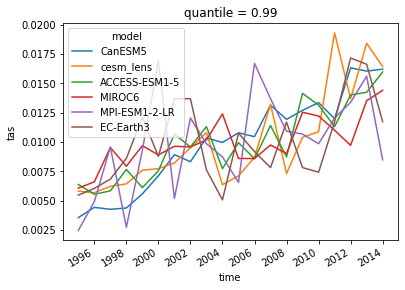

In [17]:
occurance_hist.resample(time='AS').mean().mean('member').plot(hue='model');

In [18]:
occurance_future = future > q99
occurance_future = occurance_future.where(np.isfinite(future), np.NaN)

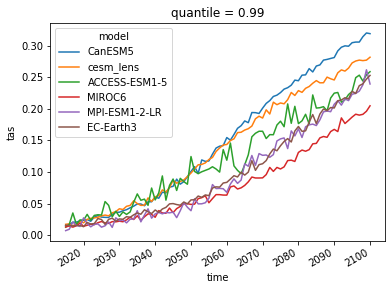

In [19]:
occurance_future.mean('member').resample(time='AS').mean().plot(hue='model');

In [20]:
occurance_future_10yr = occurance_future.resample(time='AS').mean().rolling(
    time=10, center=True).mean()

In [21]:
occurance_future_10yr

<xarray.DataArray 'tas' (model: 6, member: 58, time: 86)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... 'r3i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 0.99

### plots

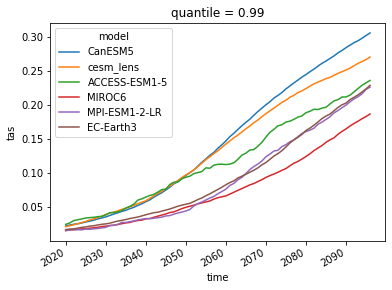

In [22]:
occurance_future_10yr.mean('member').plot(hue='model');

In [49]:
import seaborn as sns

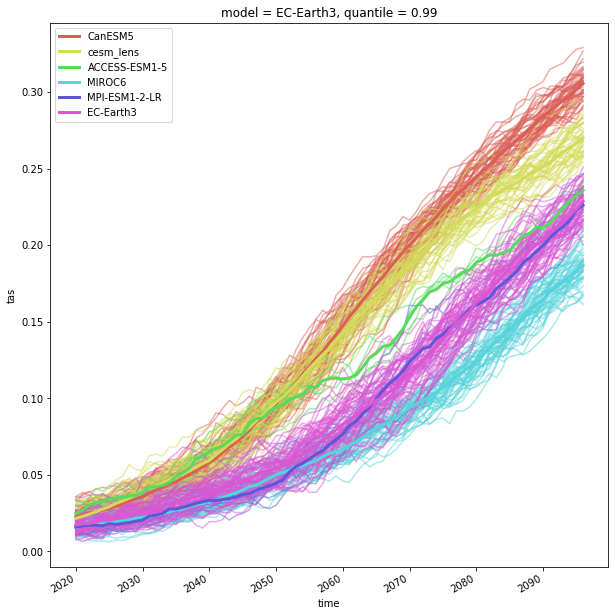

In [24]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette("hls", len(occurance_future_10yr.model))
for i, model in enumerate(occurance_future_10yr.model):
    m = occurance_future_10yr.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

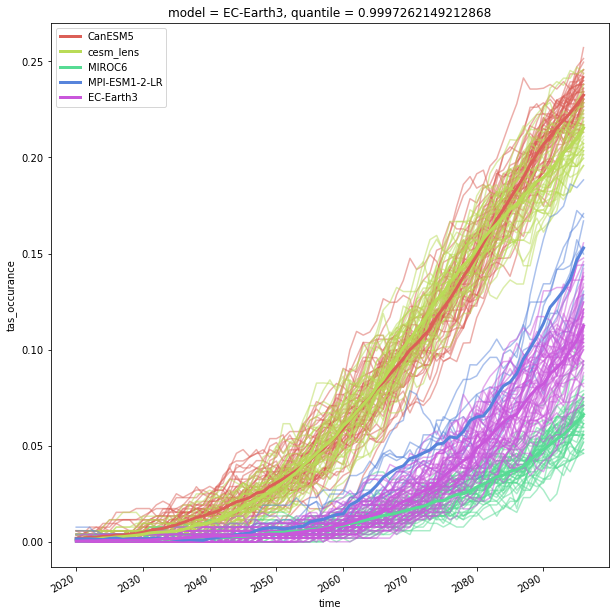

In [34]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette("hls", len(dataset.tas_occurance.model))
for i, model in enumerate(dataset.tas_occurance.model):
    m = dataset.tas_occurance.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

In [25]:
I = occurance_future_10yr.var('member').mean('model')
I

<xarray.DataArray 'tas' (time: 86)>
array([           nan,            nan,            nan,            nan,
                  nan, 2.89104523e-05, 2.77824434e-05, 2.88127707e-05,
       3.34938216e-05, 2.88334497e-05, 2.67979626e-05, 2.59227392e-05,
       2.82503864e-05, 3.23915261e-05, 2.76210695e-05, 3.25034235e-05,
       3.59194754e-05, 3.77889636e-05, 3.90021312e-05, 4.18503036e-05,
       4.41723301e-05, 4.54083658e-05, 5.18477142e-05, 5.84841700e-05,
       5.61711974e-05, 6.40823478e-05, 7.52754823e-05, 7.73187133e-05,
       7.64945096e-05, 8.05240072e-05, 7.82468076e-05, 8.12033685e-05,
       8.51491092e-05, 7.40844168e-05, 7.32945846e-05, 7.12960199e-05,
       7.15549933e-05, 7.58872862e-05, 8.52837898e-05, 7.85983651e-05,
       9.20241516e-05, 1.05973609e-04, 1.01337637e-04, 1.04209562e-04,
       9.11279521e-05, 1.00943506e-04, 1.07354346e-04, 1.00392924e-04,
       9.65247139e-05, 1.04608020e-04, 1.15615782e-04, 1.33853008e-04,
       1.32666819e-04, 1.34005235e-04, 1.19670253e-04, 1.21678127e-04,
       1.12812814e-04, 1.21039124e-04, 1.05448267e-04, 1.03392379e-04,
       1.00335224e-04, 9.33476702e-05, 9.47216824e-05, 9.22240208e-05,
       8.99719750e-05, 8.69955027e-05, 8.45429057e-05, 8.40581958e-05,
       8.92818901e-05, 8.80287466e-05, 9.48025071e-05, 1.03854514e-04,
       1.04898746e-04, 1.04901641e-04, 9.19254864e-05, 9.57336494e-05,
       8.95958060e-05, 9.05570905e-05, 9.29947364e-05, 9.51067561e-05,
       9.76126638e-05, 9.19930487e-05,            nan,            nan,
                  nan,            nan])
Coordinates:
  * time      (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
    quantile  float64 0.99

In [26]:
M = occurance_future_10yr.mean('member').var('model')
M

<xarray.DataArray 'tas' (time: 86)>
array([           nan,            nan,            nan,            nan,
                  nan, 1.24091506e-05, 1.55551371e-05, 2.46650914e-05,
       2.79412226e-05, 3.28603302e-05, 3.63048362e-05, 4.11877807e-05,
       4.38128335e-05, 4.84952771e-05, 5.06011135e-05, 6.12147535e-05,
       6.81816958e-05, 7.15442544e-05, 7.43187801e-05, 7.65079775e-05,
       9.08813102e-05, 1.03663332e-04, 1.14567140e-04, 1.46810898e-04,
       1.59381554e-04, 1.73041316e-04, 2.05744821e-04, 2.28039148e-04,
       2.65610479e-04, 2.98125846e-04, 3.16905380e-04, 3.84495961e-04,
       4.33194291e-04, 4.43348771e-04, 5.05895084e-04, 5.47567341e-04,
       5.78272845e-04, 5.94457897e-04, 6.30811328e-04, 6.92683358e-04,
       7.62519315e-04, 8.02949148e-04, 8.48570821e-04, 8.90771178e-04,
       9.43949229e-04, 1.00335462e-03, 1.04732603e-03, 1.10551840e-03,
       1.13714418e-03, 1.20304332e-03, 1.24119444e-03, 1.26898164e-03,
       1.34477099e-03, 1.39563770e-03, 1.43992415e-03, 1.47036579e-03,
       1.50998186e-03, 1.55251637e-03, 1.61134386e-03, 1.61811876e-03,
       1.65609876e-03, 1.64135169e-03, 1.63788029e-03, 1.66335703e-03,
       1.65087012e-03, 1.63943483e-03, 1.65249349e-03, 1.63444243e-03,
       1.60818788e-03, 1.59884807e-03, 1.56217538e-03, 1.53974654e-03,
       1.52769576e-03, 1.50098228e-03, 1.47308084e-03, 1.48043677e-03,
       1.44998562e-03, 1.44132760e-03, 1.42729871e-03, 1.40783428e-03,
       1.39617369e-03, 1.39274627e-03,            nan,            nan,
                  nan,            nan])
Coordinates:
  * time      (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
    quantile  float64 0.99

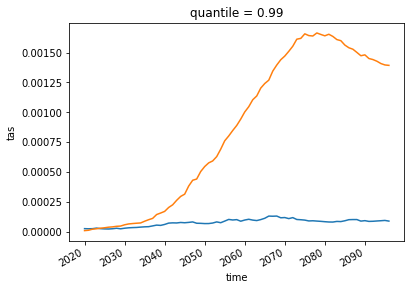

In [28]:
I.plot(label='I')
M.plot(label='M')

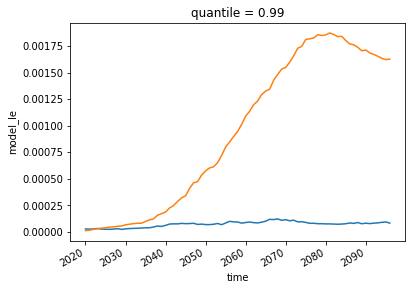

In [62]:
dataset.internal_le.plot()
dataset.model_le.plot()